<a href="https://colab.research.google.com/github/piyush1856/hypothesis-testing-scipy/blob/main/chi_square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind # 2 sample t-test
from scipy.stats import ttest_rel # paired / dependent t-test

from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

```
You have a coin. You wish to ensure that it is fair.

You decide to toss it 50 times, and note the observations.

The observed outcomes from 50 coin tosses are 28 heads and 22 tails.

Determine if the coin is fair or biased.
```

In [36]:
# H0 :The Coin is Fair.
# H1 : The Coin is Biased.

chi_stat, p_value = chisquare(
    [48, 52], # Observed or actual
    [50, 50], # Expected
)
print("p_value:",p_value)
print("chi_stat:",chi_stat)

p_value: 0.6891565167793516
chi_stat: 0.16


In [37]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Coin is baised")
else:
    print("Fail to reject H0")
    print("Coin is fair")

Fail to reject H0
Coin is fair


In [4]:
#Using the formula
(28 - 25)**2/25 + (22 - 25)**2 /25 # chi2stat

0.72

In [6]:
1 - chi2.cdf(0.72, df=1)

0.3961439091520741

In [5]:
chi2.ppf(0.95, df=1) # If the chi-squared value is greater than 3.84 we reject the null hypothesis at 5% significance level

3.841458820694124

```
You decide to check if a different coin is fair or not, in similar way.

This time, the the observed outcomes from the 50 coin tosses are 45 heads and 5 tails.

Determine whether the coin is fair or biased.
```

In [7]:
chi_stat, p_value = chisquare(
    [45, 5], # Observed or actual
    [25, 25], # Expected
)
print("p_value:",p_value)
print("chi_stat:",chi_stat)

p_value: 1.5417257900280013e-08
chi_stat: 32.0


In [8]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Coin is baised")
else:
    print("Fail to reject H0")
    print("Coin is fair")

Reject H0
Coin is baised


Chi-square Test for Independence

```
Imagine you are running a Marketing Campaign in your company.

There are 2 modes through which customers can purchase the company's products: Offline and Online.

Your goal is to run a campaign that aims at increasing the number of online purchases.
```

In [10]:
# H0 : Gender and preference are independent
# H1 : Gender and preference are not independent

observed = [
    [527, 72],
    [206, 102],]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 57.04098674049609
p_value: 4.268230756875865e-14
df: 1
exp_freq: [[484.08710033 114.91289967]
 [248.91289967  59.08710033]]


In [11]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Gender and preference are not independent")
else:
    print("Fail to reject H0")
    print("Gender and preference are independent")

Reject H0
Gender and preference are not independent


```
A national survey was conducted to obtain information on the alcohol consumption patterns of U.S. adults by marital status.
A random sample of 1772 residents, aged 18 and older, yielded the data displayed in Table below:
```
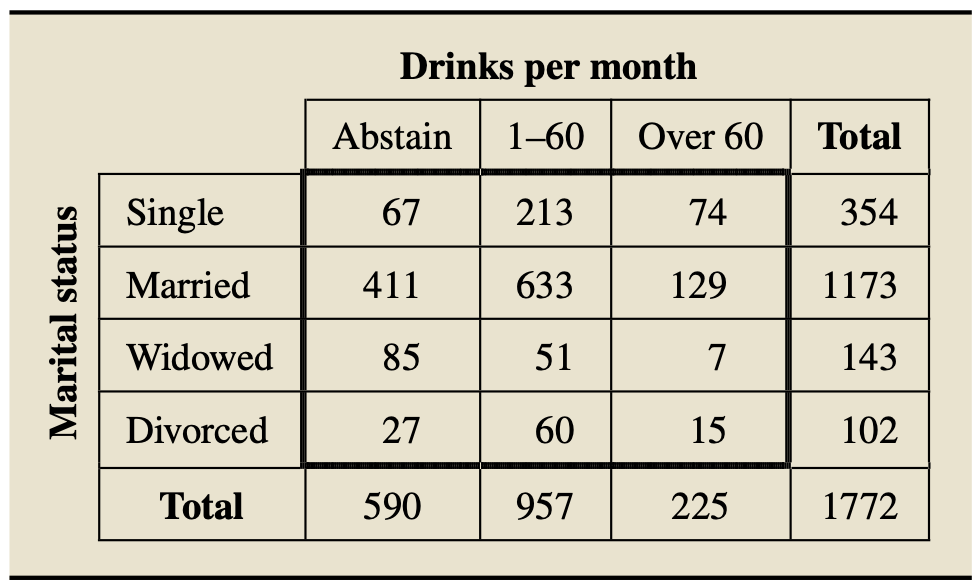

```
Test whether Marital status and alcohol consumption are associated with a 5% significance level.
```


In [12]:
# H0: Marital status and alcohol consumption are not associated.
# Ha: Marital status and alcohol consumption are associated.

observed = [
    [67, 213, 74],
    [411, 633, 129],
    [85, 51, 7],
    [27, 60, 15]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 94.26880078578765
p_value: 3.925170647869838e-18
df: 6
exp_freq: [[117.86681716 191.18397291  44.94920993]
 [390.55869074 633.49943567 148.94187359]
 [ 47.61286682  77.22968397  18.15744921]
 [ 33.96162528  55.08690745  12.95146727]]


In [15]:
alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are associated.")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are not associated.")

Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are associated.


```
A random sample of adults yielded the following data on age and Internet usage.
```
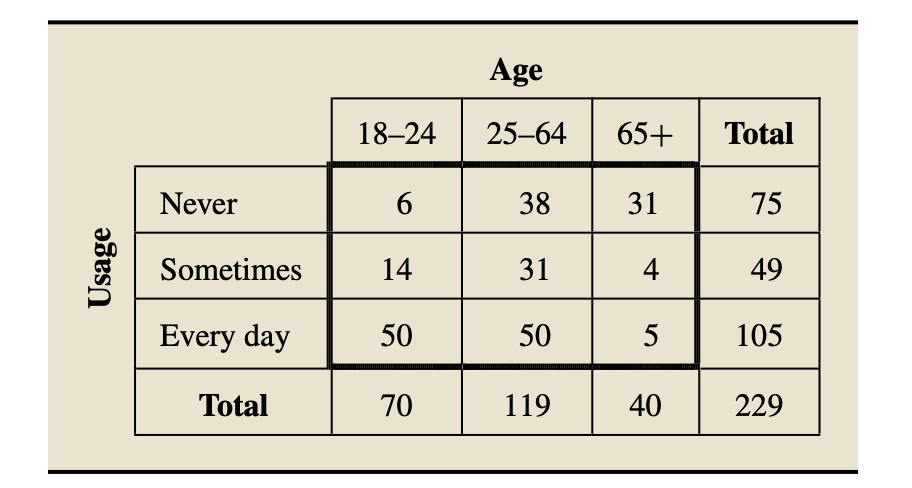

```
At 1% significance level, does the data provide sufficient evidence to conclude that an association exists between age and Internet usage?
```



In [16]:
# H0 : age and internet usage is not associated
# Ha : age and internet usage is associated

observed = [
    [6, 38, 31],
    [50, 50, 5],
    [14, 31, 4]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 60.74604310295546
p_value: 2.0217185191724964e-12
df: 4
exp_freq: [[22.92576419 38.97379913 13.10043668]
 [32.09606987 54.56331878 18.34061135]
 [14.97816594 25.4628821   8.55895197]]


In [17]:
alpha = 0.01

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis)")
else:
  print("Fail to Reject H0 (Null Hypothesis)")

Reject H0 (Null Hypothesis)


```
The U.S. Census Bureau compiles information on the money income of people by type of residence and publishes its finding in Current Population Reports.

Independent simple random samples of people consists of following types of residences

Inside Principal Cities (IPC),
Outside Principal Cities but within Metropolitan Areas (OPC), and
Outside Metropolitan Areas (OMA),
The Census gave the following data on income levels:
```
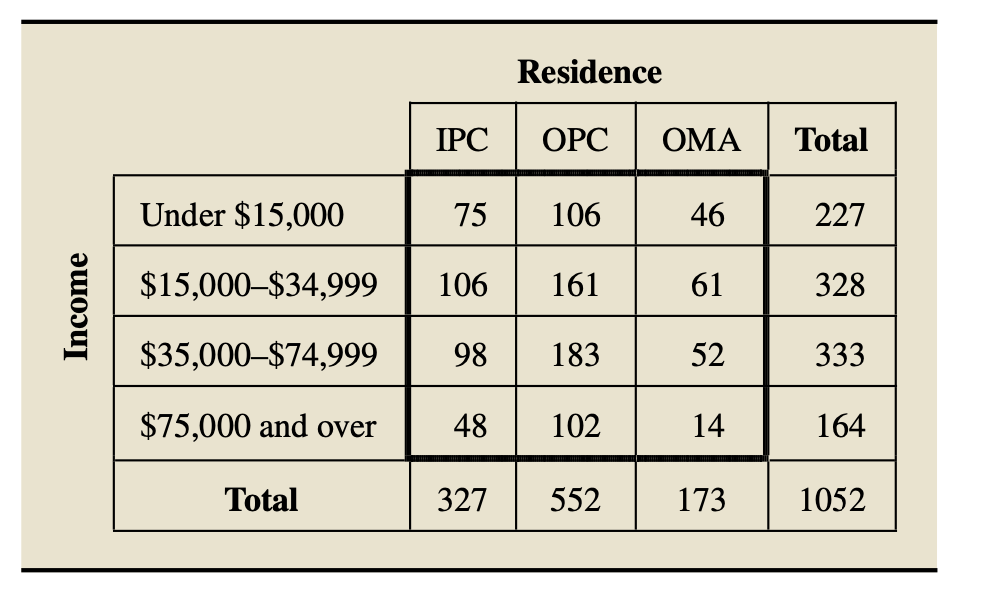
```
At the 5% significance level, can you conclude that the type of residence is related to income level?
```

In [18]:
# H0 : Type of Residence is not related to income level
# Ha : Type of Residence is related to income level

observed = [
    [75, 106, 46],
    [106, 161, 61],
    [98, 183, 52],
    [48, 102, 14]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 15.727554171801787
p_value: 0.015293451318673136
df: 6
exp_freq: [[ 70.55988593 119.11026616  37.32984791]
 [101.95437262 172.10646388  53.9391635 ]
 [103.50855513 174.73003802  54.76140684]
 [ 50.97718631  86.05323194  26.96958175]]


In [20]:
alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis)")
else:
  print("Fail to Reject H0 (Null Hypothesis)")

Reject H0 (Null Hypothesis)


```
According to a survey conducted on car owners, it was determined that

60% of owners have only one car,
28% have two cars, and
12% have three or more cars.
Suppose Ram conducted his own survey within his residential society, and found that

73 owners have only one car,
38 owners have two cars, and
18 owners have three or more cars.
Determine whether Ram's survey supports the original one, with a significance level of 0.05.
```

In [24]:
# Null Hypothesis (H0): The distribution of the number of cars owned by car owners in your survey is the same as the distribution in the original survey.
# Alternative Hypothesis (H1): The distribution of the number of cars owned by car owners in your survey is different from the distribution in the original survey.

# Original survey distribution
expected_distribution = np.array([0.60, 0.28, 0.12])

# Your survey results
observed_distribution = np.array([73, 38, 18])

# Calculate the expected counts based on your sample size
total_sample_size = observed_distribution.sum()
expected_counts = expected_distribution * total_sample_size


# Perform the Chi-Square Goodness of Fit test
chi_squared_stat, p_value = chisquare(f_obs=observed_distribution, f_exp=expected_counts)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. Your survey results are significantly different.")
else:
    print("Fail to reject the null hypothesis. Your survey results are consistent with the original survey.")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")


Fail to reject the null hypothesis. Your survey results are consistent with the original survey.
Chi-Square Statistic: 0.7582133628645247
P-value: 0.6844725882551137


```
A Mobile Retail store owner is interested in the distribution of popular smartphone brands among a group of 200 people.

They expect that 30% of people would prefer Brand A, 40% would prefer Brand B and 30% would prefer Brand C.

However, upon surveying the group, the results are as follows: 70 prefer Brand A, 80 prefer Brand B, and 50 prefer Brand C.

Conduct an appropriate test to see if the distribution of preferences matches the store owner's expectations at a 5% significance level.
```

In [28]:
# H0 : expectation matching
# Ha : expectation not matching

expected_distribution = np.array([0.30, 0.40, 0.30])

observed_distribution = np.array([70, 80, 50])

total_sample_size = observed_distribution.sum()

expected_counts = expected_distribution * total_sample_size

chi_stat, p_value = chisquare(f_obs=observed_distribution, f_exp=expected_counts)

print("chi_stat:",chi_stat)
print("p_value:",p_value)

chi_stat: 3.3333333333333335
p_value: 0.1888756028375618


In [29]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Fail to reject the null hypothesis.


```
Suppose you are interested in the distribution of time spent on a website, by it's users. You expect that:

20% of users spend less than 5 minutes,
50% spend between 5 and 10 minutes, and
30% spend more than 10 minutes.
After collecting data from 200 users, you find that

30 users spent less than 5 minutes,
85 users spent between 5 and 10 minutes, and
85 users spent more than 10 minutes.
Conduct an appropriate test to see if the distribution of browsing times matches your expectations at a 5% significance level. Choose the correct
```

In [33]:
# H0 : expectation matching
# Ha : expectation not matching

expected_distribution = [0.20, 0.50, 0.30]
sample_size = 200

observed_data = [30, 85, 85]
expected_count = [x * sample_size for x in expected_distribution]
print(expected_count)
chi_stat, p_value = chisquare(f_obs=observed_data, f_exp=expected_count)

print("chi_stat:",chi_stat)
print("p_value:",p_value)

[40.0, 100.0, 60.0]
chi_stat: 15.166666666666666
p_value: 0.0005088621855732918


In [34]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


```
Suppose you have data on 150 students' exam scores, and you want to test if the distribution of scores falls within predefined categories.

The expected distribution is

30% in the "Excellent" category,
40% in the "Good" category, and
30% in the "Average" category.
Upon observation, you notice that there are:

45 students fall into the "Excellent" category,
50 students into the "Good" category, and
55 students into the "Average" category.
Conduct an appropriate test to see if the distribution matches expectations at a 5% significance level, and choose the correct option
```

In [38]:
# H0 : Matching
# Ha : Not Matching

expected_distribution = [0.30, 0.40, 0.30]
sample_size = 150

observed_data = [45, 50, 55]
expected_count = [x * sample_size for x in expected_distribution]

chi_stat, p_value = chisquare(f_obs=observed_data, f_exp=expected_count)

print("chi_stat:",chi_stat)
print("p_value:",p_value)

chi_stat: 3.8888888888888893
p_value: 0.1430666827544082


In [39]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


```
Preventable chronic diseases are increasing rapidly in Native American populations, particularly diabetes.

Below is a contingency table showing the cross-classification of educational attainment and diabetic state.
```
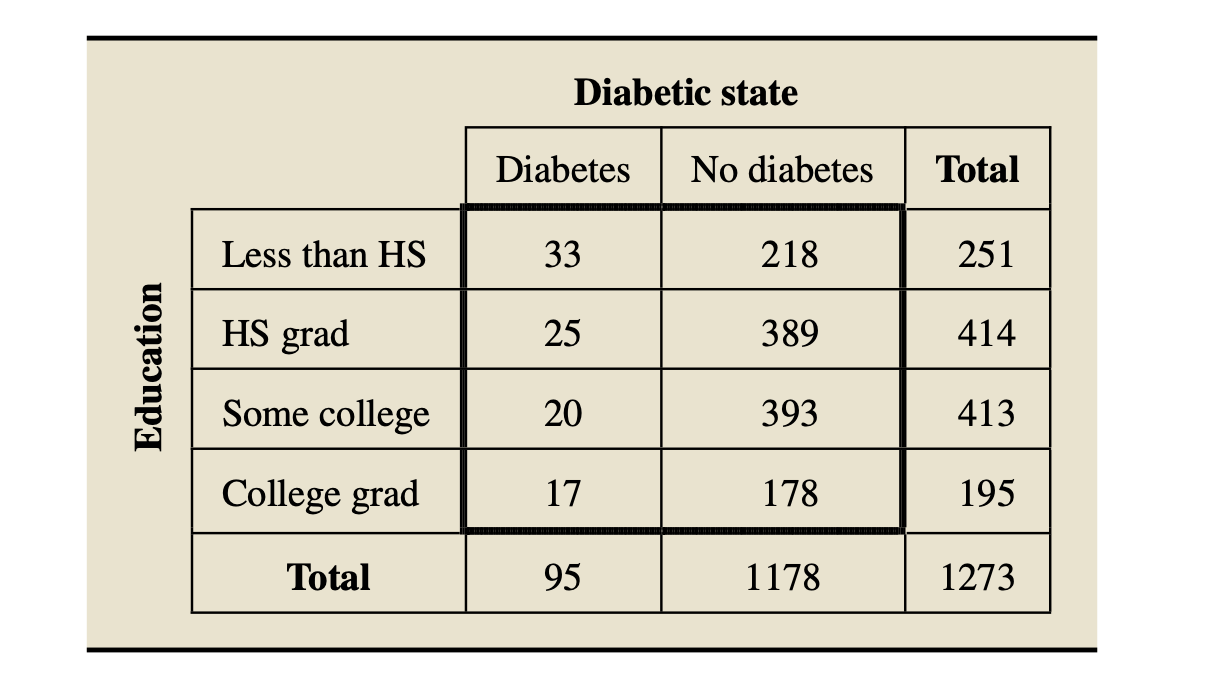

```
At 1% significance level, does the data provide sufficient evidence to conclude that an association exists between educational level and diabetic state for Native Americans?
```

In [40]:
# H0 : no association exists between educational level and diabetic state
# Ha : association exists between educational level and diabetic state

observed = [
    [33, 218],
    [25, 389],
    [20, 393],
    [17, 178]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 17.51186847271713
p_value: 0.000554511571355531
df: 3
exp_freq: [[ 18.73134328 232.26865672]
 [ 30.89552239 383.10447761]
 [ 30.82089552 382.17910448]
 [ 14.55223881 180.44776119]]


In [41]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


```
A Nationwide survey was conducted where an independent and random sample of adults residing in urban, suburban, and rural regions, were asked a question: "Do you support or oppose the motion of requiring a background check, for all gun buyers?"

The survey results are in the table below:
```
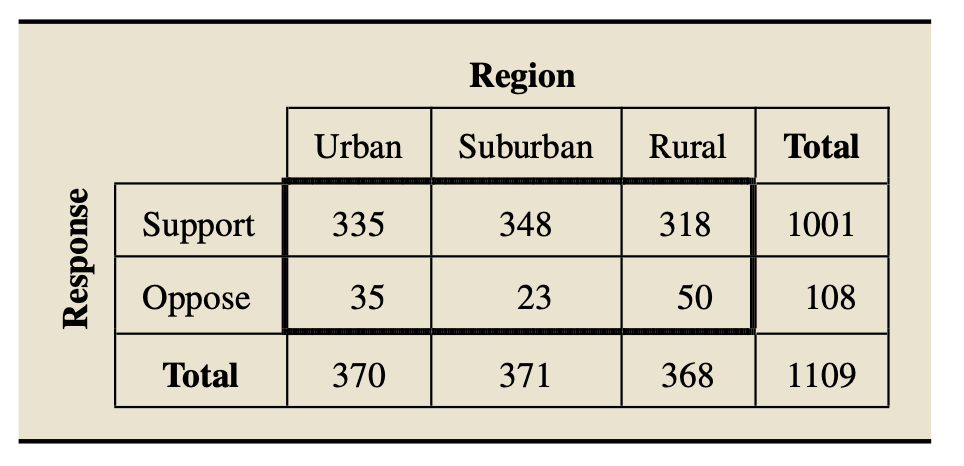
```
At 1% significance level, does the data provide sufficient evidence to conclude that there is an association between the region that an adult resides in, and the response received from them?
```

In [42]:
# H0 : data provide insufficient evidence to conclude that there is an association between the region that an adult resides
# Ha : data provide sufficient evidence to conclude that there is an association between the region that an adult resides

observed = [
    [335, 348, 318],
    [35, 23, 50]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 11.519544916042339
p_value: 0.003151828690194211
df: 2
exp_freq: [[333.96753832 334.87015329 332.16230839]
 [ 36.03246168  36.12984671  35.83769161]]


In [43]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.
